In [1]:
import iris
import os 
import numpy as np
import iris   

import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from iris.time import PartialDateTime
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# plot temperature

In [2]:
path = './air.mon.mean.nc'
cube = iris.load_cube(path)

In [3]:
print(cube)

Monthly Mean Air Temperature at sigma level 0.995 / (degC) (time: 866; latitude: 73; longitude: 144)
     Dimension coordinates:
          time                                                  x              -              -
          latitude                                              -              x              -
          longitude                                             -              -              x
     Attributes:
          Conventions: COARDS
          NCO: 20121012
          References: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived...
          actual_range: [-73.78001  42.14595]
          dataset: NCEP Reanalysis Derived Products
          dataset_title: NCEP-NCAR Reanalysis 1
          description: Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma...
          history: Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc...
          least_significant_digit: 0
    

In [4]:
print(cube.coord('time')[:4])
print(cube.coord('time')[-4:])

DimCoord([1948-01-01 00:00:00, 1948-02-01 00:00:00, 1948-03-01 00:00:00,
       1948-04-01 00:00:00], standard_name='time', calendar='gregorian', long_name='Time', var_name='time', attributes={'actual_range': array([1297320., 1929216.]), 'avg_period': '0000-01-00 00:00:00', 'delta_t': '0000-01-00 00:00:00', 'prev_avg_period': '0000-00-01 00:00:00'})
DimCoord([2019-11-01 00:00:00, 2019-12-01 00:00:00, 2020-01-01 00:00:00,
       2020-02-01 00:00:00], standard_name='time', calendar='gregorian', long_name='Time', var_name='time', attributes={'actual_range': array([1297320., 1929216.]), 'avg_period': '0000-01-00 00:00:00', 'delta_t': '0000-01-00 00:00:00', 'prev_avg_period': '0000-00-01 00:00:00'})


In [5]:
# select May, June, July, 1992-2015
from iris.time import PartialDateTime
month_start = PartialDateTime(month = 5)
month_end = PartialDateTime(month = 7)
year_start = PartialDateTime(year = 1992)
year_end = PartialDateTime(year = 2015)
part_temp = cube.extract(iris.Constraint(time=lambda x : month_start<=x<=month_end) & \
                         iris.Constraint(time=lambda x : year_start<=x<=year_end))
print(part_temp)

Monthly Mean Air Temperature at sigma level 0.995 / (degC) (time: 72; latitude: 73; longitude: 144)
     Dimension coordinates:
          time                                                  x             -              -
          latitude                                              -             x              -
          longitude                                             -             -              x
     Attributes:
          Conventions: COARDS
          NCO: 20121012
          References: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived...
          actual_range: [-73.78001  42.14595]
          dataset: NCEP Reanalysis Derived Products
          dataset_title: NCEP-NCAR Reanalysis 1
          description: Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma...
          history: Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc...
          least_significant_digit: 0
        

In [6]:
# calculate average temperature
mean_temp = part_temp.collapsed(['time'],iris.analysis.MEAN)
print(mean_temp)

Monthly Mean Air Temperature at sigma level 0.995 / (degC) (latitude: 73; longitude: 144)
     Dimension coordinates:
          latitude                                                  x              -
          longitude                                                 -              x
     Scalar coordinates:
          time: 2003-11-30 12:00:00, bound=(1992-05-01 00:00:00, 2015-07-01 00:00:00)
     Attributes:
          Conventions: COARDS
          NCO: 20121012
          References: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived...
          actual_range: [-73.78001  42.14595]
          dataset: NCEP Reanalysis Derived Products
          dataset_title: NCEP-NCAR Reanalysis 1
          description: Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma...
          history: Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc...
          least_significant_digit: 0
          level_desc: 

/home/leyan/miniconda3/envs/ece143/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [39]:
def region_based_cube(cube,coords):
    '''
    Inputs:
        cube with latitude and longitude as coords
        coords: the region we want to extract from input cube
    Outputs: 
        A smaller cube within coords
    '''
    lat_min,lat_max,long_min,long_max = coords
    lat_cons = iris.Constraint(latitude = lambda x : lat_min < x < lat_max)
    if (long_min<0):
        long_min = long_min+360
    if(long_max <0) :
        long_max = long_max+360
    long_cons = iris.Constraint(longitude = lambda x : long_min < x < long_max)
    new_cube = cube.extract(lat_cons & long_cons)
    return new_cube

In [38]:
coords = [24, 72, -170, -65]
lat_min,lat_max,long_min,long_max = coords

In [9]:
# extract US region
us_temp = region_based_cube(mean_temp, coords)

In [10]:
lat = us_temp.coord('latitude').points
lon = us_temp.coord('longitude').points
print(lat)
print(lon)

[70.  67.5 65.  62.5 60.  57.5 55.  52.5 50.  47.5 45.  42.5 40.  37.5
 35.  32.5 30.  27.5 25. ]
[192.5 195.  197.5 200.  202.5 205.  207.5 210.  212.5 215.  217.5 220.
 222.5 225.  227.5 230.  232.5 235.  237.5 240.  242.5 245.  247.5 250.
 252.5 255.  257.5 260.  262.5 265.  267.5 270.  272.5 275.  277.5 280.
 282.5 285.  287.5 290.  292.5]


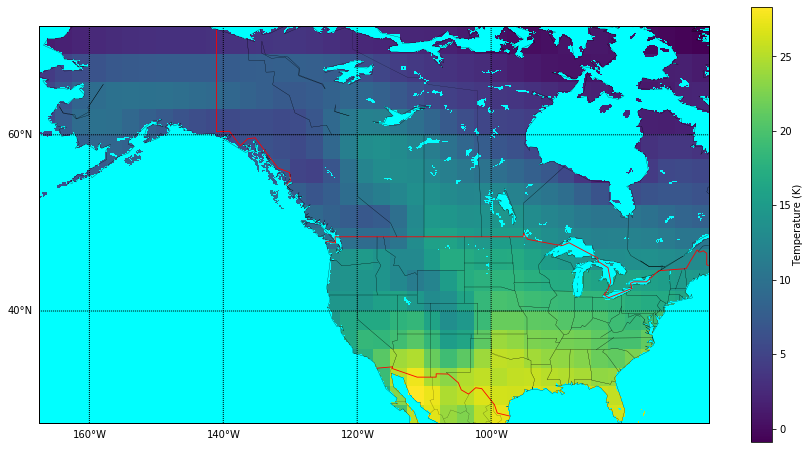

In [12]:
from pylab import *
plt.figure(figsize=[15,8])
m=Basemap(projection='mill',lat_ts=10, \
  llcrnrlon=lon.min(),urcrnrlon=lon.max(), \
  llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
# m=Basemap(projection='mill',llcrnrlat=25,urcrnrlat=50,\
#             llcrnrlon=-125,urcrnrlon=-80,)
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.85,color='red')
m.drawstates(linewidth=0.15)
m.drawmapboundary()
m.drawparallels(np.arange(0.,90.,20),labels=[1,0,0,0],fontsize=10)
m.drawmeridians(np.arange(-160,-90,20),labels=[0,0,0,1],fontsize=10)
# m.fillcontinents(color='lightgrey', zorder=1,lake_color='aqua')
m.drawlsmask(land_color=(0,0,0,0),ocean_color='aqua',lakes=True,zorder=1)

Lon,Lat = meshgrid(lon,lat)
x, y = m(Lon,Lat)
cs = m.pcolormesh(x,y,us_temp.data,shading='flat',cmap='viridis')
# cs = m.pcolormesh(x,y,us_temp.data,shading='flat',cmap='BuGnYl')
cbar= plt.colorbar()
cbar.set_label("Temperature (K)", labelpad=+1)
plt.show()

# plot rainfall

In [13]:
PATH = os.path.join(os.getcwd(), "precip.mon.mean.nc")
rain_cube = iris.load_cube(PATH)
print(rain_cube.shape)

(492, 72, 144)


In [14]:
# also select May, June and July
month_start = PartialDateTime(month = 5)
month_end = PartialDateTime(month = 7)
year_start = PartialDateTime(year = 1992)
year_end = PartialDateTime(year = 2015)
part_rain = rain_cube.extract(iris.Constraint(time=lambda x : month_start<=x<=month_end) & \
                         iris.Constraint(time=lambda x : year_start<=x<=year_end))
print(part_rain)

Average Monthly Rate of Precipitation / (mm/day) (time: 72; latitude: 72; longitude: 144)
     Dimension coordinates:
          time                                        x             -              -
          latitude                                    -             x              -
          longitude                                   -             -              x
     Attributes:
          Conventions: COARDS
          References: https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
          actual_range: [ 0.   59.08]
          data_modified: 2020-01-10
          dataset: CPC Merged Analysis of Precipitation Standard
          dataset_title: CPC Merged Analysis of Precipitation
          date_modified: 26 Feb 2019
          documentation: https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
          history: update 01/2020 V2001
          least_significant_digit: 2
          level_desc: Surface
          parent_stat: Mean
          platform: Analyses
          preci

In [15]:
mean_rain = part_rain.collapsed(['time'],iris.analysis.MEAN)
us_rain = region_based_cube(mean_rain, coords)

/home/leyan/miniconda3/envs/ece143/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [16]:
lat = us_rain.coord('latitude').points
lon = us_rain.coord('longitude').points

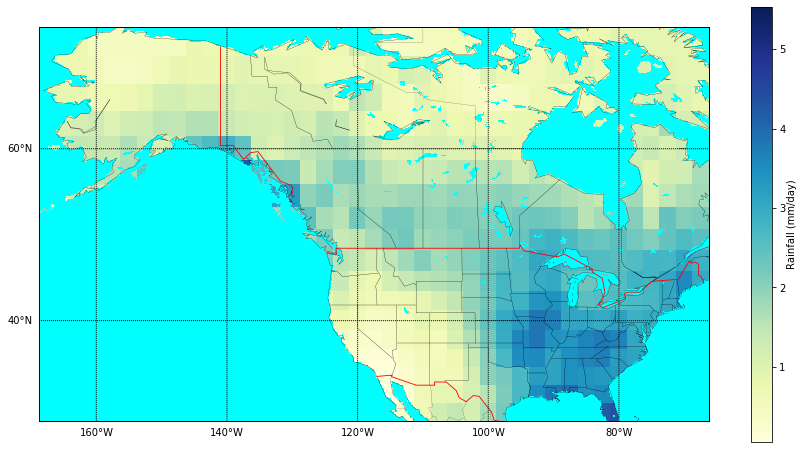

In [18]:
from pylab import *
plt.figure(figsize=[15,8])
m=Basemap(projection='mill',lat_ts=10, \
  llcrnrlon=lon.min(),urcrnrlon=lon.max(), \
  llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
# m=Basemap(projection='mill',llcrnrlat=25,urcrnrlat=50,\
#             llcrnrlon=-125,urcrnrlon=-80,)
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.85,color='red')
m.drawstates(linewidth=0.15)
m.drawmapboundary()
m.drawparallels(np.arange(0.,90.,20),labels=[1,0,0,0],fontsize=10)
m.drawmeridians(np.arange(-160,-70,20),labels=[0,0,0,1],fontsize=10)
# m.fillcontinents(color='lightgrey', zorder=1,lake_color='aqua')
m.drawlsmask(land_color=(0,0,0,0),ocean_color='aqua',lakes=True,zorder=1)

Lon,Lat = meshgrid(lon,lat)
x, y = m(Lon,Lat)
cs = m.pcolormesh(x,y,us_rain.data,shading='flat',cmap=plt.cm.YlGnBu)
cbar= plt.colorbar()
cbar.set_label("Rainfall (mm/day)", labelpad=+1)
plt.show()

# plot vegetation

In [20]:
#dataset link: https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00813
path = './AVHRR-Land_v005_AVH13C1_NOAA-14_20000101_c20170623095628.nc'
veg_raw = iris.load_raw(path)
print(veg_raw)

0: Quality Assurance / (1)             (time: 1; latitude: 3600; longitude: 7200)
1: normalized_difference_vegetation_index / (1) (time: 1; latitude: 3600; longitude: 7200)
2: Time since Start of Data Day / (hours since 2000-01-01 00:00:00) (time: 1; latitude: 3600; longitude: 7200)
3: crs / (1)                           (-- : 1)


/home/leyan/miniconda3/envs/ece143/lib/python3.7/site-packages/iris/fileformats/cf.py:1038: UserWarning: Ignoring variable 'crs' referenced by variable 'QA': Dimensions ('ncrs',) do not span ('time', 'latitude', 'longitude')
  warnings.warn(msg)
/home/leyan/miniconda3/envs/ece143/lib/python3.7/site-packages/iris/fileformats/cf.py:1038: UserWarning: Ignoring variable 'crs' referenced by variable 'NDVI': Dimensions ('ncrs',) do not span ('time', 'latitude', 'longitude')
  warnings.warn(msg)
/home/leyan/miniconda3/envs/ece143/lib/python3.7/site-packages/iris/fileformats/cf.py:1038: UserWarning: Ignoring variable 'crs' referenced by variable 'TIMEOFDAY': Dimensions ('ncrs',) do not span ('time', 'latitude', 'longitude')
  warnings.warn(msg)


In [50]:
veg_cube = veg_raw[1]
print(veg_cube)
print(veg_cube.coord('longitude').points)
# this dataset only has vegetation data for one day 2000/01/01

normalized_difference_vegetation_index / (1) (time: 1; latitude: 3600; longitude: 7200)
     Dimension coordinates:
          time                                    x            -                -
          latitude                                -            x                -
          longitude                               -            -                x
     Attributes:
          Conventions: CF-1.6, ACDD-1.3
          ESDT: AVH13C1
          InputDataType: GAC
          Instrument: AVHRR
          LocalGranuleId: AVHRR-Land_v005_AVH13C1_NOAA-14_20000101_c20170623095628.nc
          PFIIVersion: 3.5.45
          PercentMissingData: 19.82
          PercentValidClearDaytimeLand: 3.94
          PercentValidClearDaytimeWater: 0.00
          PercentValidDaytimeData: 32.03
          PercentValidDaytimeLand: 32.03
          PercentValidDaytimeLandInCloudShadow: 1.19
          PercentValidDaytimeWaterInCloudShadow: 0.00
          PostProcessingVersion: 2.9
          Process: LTDR_GAPS
  

In [57]:
# extract US area
# here we cannot use region_based_cube because of the coordinate problem
# longitude in this dataset is already -180 to 180 not 0 to 360
lat_cons = iris.Constraint(latitude = lambda x : lat_min < x < lat_max)
long_cons = iris.Constraint(longitude = lambda x : long_min < x < long_max)
us_veg = veg_cube.extract(lat_cons & long_cons)

# remove the time dimension
us_veg = us_veg[0,:, :]

In [58]:
lat = us_veg.coord('latitude').points
lon = us_veg.coord('longitude').points

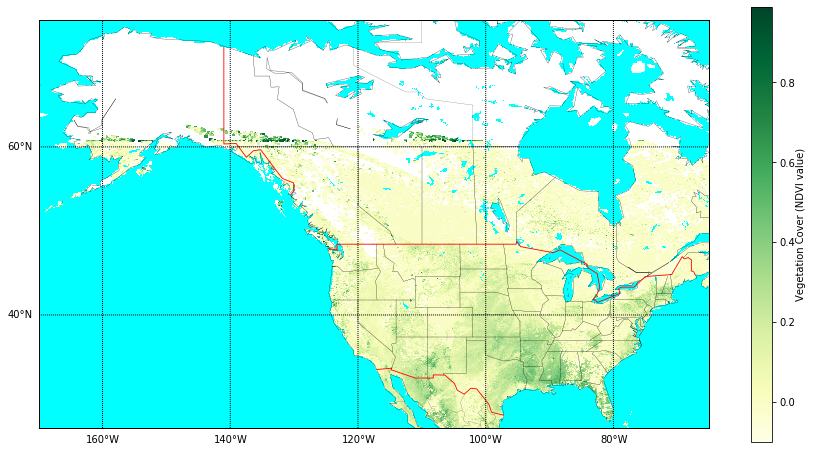

In [62]:
from pylab import *
plt.figure(figsize=[15,8])
m=Basemap(projection='mill',lat_ts=10, \
  llcrnrlon=lon.min(),urcrnrlon=lon.max(), \
  llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
# m=Basemap(projection='mill',llcrnrlat=25,urcrnrlat=50,\
#             llcrnrlon=-125,urcrnrlon=-80,)
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.85,color='red')
m.drawstates(linewidth=0.15)
m.drawmapboundary()
m.drawparallels(np.arange(0.,90.,20),labels=[1,0,0,0],fontsize=10)
m.drawmeridians(np.arange(-160,-70,20),labels=[0,0,0,1],fontsize=10)
# m.fillcontinents(color='lightgrey', zorder=1,lake_color='aqua')
m.drawlsmask(land_color=(0,0,0,0),ocean_color='aqua',lakes=True,zorder=1)

Lon,Lat = meshgrid(lon,lat)
x, y = m(Lon,Lat)
cs = m.pcolormesh(x,y,us_veg.data,shading='flat',cmap=plt.cm.YlGn)
cbar= plt.colorbar()
cbar.set_label("Vegetation Cover (NDVI value)", labelpad=+1)
plt.show()